# Modelos de Regresión Lineal
## Modelo con Datos simulados
* Regresión lineal: Ye = α + β * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Componente de error: Y = α + β * x + e = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
e = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 0.3 * x

In [5]:
y_act = 5 + 0.3 * x + e

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame({
    "x": x_list,
    "y": y_act_list,
    "y_pred": y_pred_list,
})

In [8]:
data.head()

,x,y,y_pred
0,-0.629595,5.654951,4.811121
1,0.637044,4.425814,5.191113
2,0.690385,7.177423,5.207116
3,1.963452,5.075895,5.589036
4,-3.445241,3.418006,3.966428


In [9]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor actual vs Predicción')

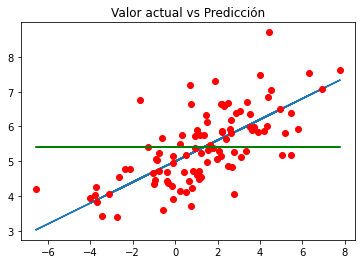

In [10]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor actual vs Predicción")

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [11]:
y_m = np.mean(y_act)
data["SSR"] = (data["y_pred"] - y_m)**2
data["SSD"] = (data["y_pred"] - data["y"])**2
data["SST"] = (data["y"] - y_m)**2

In [12]:
data.head()

,x,y,y_pred,SSR,SSD,SST
0,-0.629595,5.654951,4.811121,0.358770,0.712049,0.059954
1,0.637044,4.425814,5.191113,0.047953,0.585683,0.968810
2,0.690385,7.177423,5.207116,0.041201,3.882113,3.123447
3,1.963452,5.075895,5.589036,0.032019,0.263314,0.111690
4,-3.445241,3.418006,3.966428,2.084177,0.300767,3.968423


In [13]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [14]:
SSR

59.882926566319036

In [15]:
SSD

60.221532981032695

In [16]:
SST

109.52122521169225

In [17]:
SSR+SSD

120.10445954735172

In [18]:
R2 = SSR/SST
R2

0.5467700571334191

(array([ 1.,  3.,  6.,  8., 17., 24., 21., 11.,  7.,  2.]),
 array([-2.38223124, -1.95147847, -1.5207257 , -1.08997294, -0.65922017,
        -0.22846741,  0.20228536,  0.63303812,  1.06379089,  1.49454366,
         1.92529642]),
 <BarContainer object of 10 artists>)

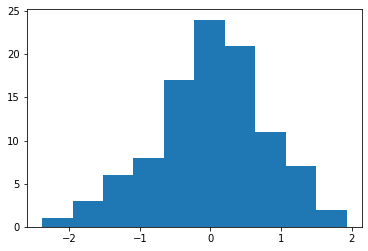

In [19]:
plt.hist(data["y_pred"] - np.mean(y_act))

## Obteniendo la Recta de Regresión
* y = α + β * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [20]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y"])

In [21]:
data["beta_n"] = (data["x"] - x_mean) * (data["y"] - y_mean)
data["beta_d"] = (data["x"] - x_mean)**2

In [22]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [23]:
alpha = y_mean - beta * x_mean

In [24]:
alpha, beta

(5.047219662749775, 0.27355755318559277)

El modelo lineal obtenido por regresión es: y = 4.978208617493975 + 1.8947680627915697 * x

In [25]:
data["y_model"] = alpha + beta * data["x"]

In [26]:
data.head()

,x,y,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,-0.629595,5.654951,4.811121,0.358770,0.712049,0.059954,-0.478962,3.826336,4.874989
1,0.637044,4.425814,5.191113,0.047953,0.585683,0.968810,0.678626,0.475359,5.221488
2,0.690385,7.177423,5.207116,0.041201,3.882113,3.123447,-1.124236,0.404651,5.236080
3,1.963452,5.075895,5.589036,0.032019,0.263314,0.111690,-0.212868,0.405699,5.584337
4,-3.445241,3.418006,3.966428,2.084177,0.300767,3.968423,9.505752,22.769579,4.104748


In [27]:
SSR = sum((data["y_pred"] - y_mean)**2)
SSD = sum((data["y_pred"] - data["y"])**2)
SST = sum((data["y"] - y_mean)**2)

In [28]:
SSR, SSD, SST

(59.88292656631902, 60.221532981032695, 109.52122521169223)

In [29]:
R2 = SSR/SST
R2

0.5467700571334191

Text(0.5, 1.0, 'Valor actual vs Predicción')

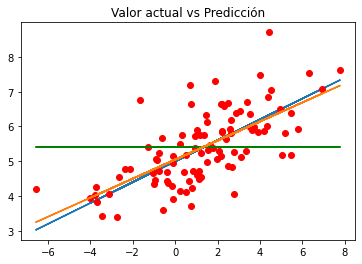

In [30]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"], data["y_pred"])
plt.plot(data["x"], data["y"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor actual vs Predicción")

## Error Estandar de los Residuos (RSE)

In [32]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7839039728065972

In [35]:
aux = np.mean(data["y"])

In [37]:
RSE/aux

0.14489650687531422